# SEGUNDO PARCIAL DE SIS420

Apellido y Nombre:Jorge Cedillo Luis Fabian

CU: 35-5276

Carrera: Ing. Sistemas

### 2. Desarrolle un cuadernillo aplicando aprendizaje por refuerzo, para que un agente pueda jugar cuatro en raya.

Link de GitHub: https://github.com/LuisFabianJorgeCedillo/SIS420/tree/main

Link de GitLab: https://gitlab.com/sis420/sis420-ia/-/tree/main/Parcial%202

# **APRENDIZAJE POR REFUERZO**

## Aplicación: Cuatro en Línea

## Descripción del Juego Cuatro en Línea
## Propósito

El propósito del juego Cuatro en Línea es que un jugador sea el primero en conseguir una fila continua de cuatro fichas del mismo color en un tablero vertical. Esa fila puede ser horizontal, vertical o en diagonal.

## Elementos

- Tablero: Un tablero vertical compuesto por 6 filas y 7 columnas.

- Fichas: Fichas de dos colores diferentes, comúnmente rojo y amarillo. Cada jugador dispone de fichas de un solo color.

## Normas del Juego
Preparativos:

El tablero se coloca verticalmente entre los jugadores.

Cada jugador selecciona el color de sus fichas.

## Desarrollo del Juego:
Los jugadores se turnan para colocar una ficha en cualquiera de las columnas del tablero.

Las fichas caen hacia abajo y se posicionan en el espacio más bajo disponible dentro de esa columna.

## Turnos:
En cada turno, un jugador introduce una ficha en la columna que elija.

La ficha desciende hasta ocupar el lugar libre más bajo de esa columna.

Los jugadores alternan turnos hasta que alguien gane o el tablero quede lleno.

## Condición de Victoria:
Gana el jugador que consiga formar una línea consecutiva de cuatro fichas iguales en horizontal, vertical o diagonal.
Si el tablero se llena sin que ningún jugador logre esta condición, el resultado es un empate.

## Estrategias
Anticipación: Los jugadores deben prever movimientos para impedir al adversario y, al mismo tiempo, buscar formar una línea de cuatro fichas.

Dominio del Centro: Controlar las columnas centrales es ventajoso porque permite mayor cantidad de combinaciones para ganar.

Bloqueo: Es importante estar atentos a las jugadas del contrario y colocar fichas para bloquear sus intentos de completar la línea ganadora.

## Desarrollo del Modelo de Aprendizaje por Refuerzo
Para crear un modelo de aprendizaje por refuerzo para Cuatro en Línea, se sigue este procedimiento:

## Representación del Tablero y sus Operaciones:
Modelar el tablero y determinar los movimientos permitidos.
Implementar la lógica que actualice el estado del tablero y verifique si el juego ha finalizado.

## Definición de los Jugadores (Agentes):
Establecer agentes que aprenderán a jugar mediante el uso de funciones de valor.

## Gestión del Proceso de Juego:
Diseñar una clase que maneje la dinámica del juego, incluyendo el cambio de turnos y la asignación de recompensas.

## Entrenamiento de los Agentes:
Entrenar a los agentes jugando múltiples partidas entre ellos, actualizando sus tablas de valor según los resultados obtenidos.

## En el Juego de Cuatro en Raya

- Agente: Los jugadores que intentan ganar el juego.
- Entorno: El tablero de Cuatro en Raya.
- Acción: Colocar una ficha en una columna.
- Estado: La configuración actual del tablero.
- Recompensa: +1 si el agente gana, 0 si empata, y -1 si pierde.

##  Clase Board:

Representa el tablero de cuatro en raya y maneja los movimientos y el estado del juego.

In [1]:
import numpy as np

class Board():
    def __init__(self):
        # Inicializa un tablero vacío de 6 filas y 7 columnas
        self.rows = 6
        self.cols = 7
        self.state = np.zeros((self.rows, self.cols))

    def valid_moves(self):
        # Devuelve una lista de las columnas que no están llenas, las columnas donde se pueden insertar fichas.
        return [col for col in range(self.cols) if self.state[0, col] == 0]

    def update(self, symbol, col):
        # Inserta el símbolo del jugador en la columna especificada
        # La ficha cae a la posición más baja disponible en esa columna
        for row in range(self.rows - 1, -1, -1):
            if self.state[row, col] == 0:
                self.state[row, col] = symbol
                break

    def is_game_over(self):
        # Comprueba si el juego ha terminado con una victoria o un empate

        # Comprobar filas
        # Recorre cada fila y verifica si hay cuatro fichas consecutivas del mismo jugador.
        for row in range(self.rows):
            for col in range(self.cols - 3):
                if np.all(self.state[row, col:col + 4] == 1):
                    return 1
                if np.all(self.state[row, col:col + 4] == -1):
                    return -1

        # Comprobar columnas
        for row in range(self.rows - 3):
            for col in range(self.cols):
                if np.all(self.state[row:row + 4, col] == 1):
                    return 1
                if np.all(self.state[row:row + 4, col] == -1):
                    return -1

        # Comprobar diagonales
        for row in range(self.rows - 3):
            for col in range(self.cols - 3):
                if np.all([self.state[row + i, col + i] == 1 for i in range(4)]):
                    return 1
                if np.all([self.state[row + i, col + i] == -1 for i in range(4)]):
                    return -1
                if np.all([self.state[row + 3 - i, col + i] == 1 for i in range(4)]):
                    return 1
                if np.all([self.state[row + 3 - i, col + i] == -1 for i in range(4)]):
                    return -1

        # Comprobar empate, Si no hay movimientos válidos restantes, el juego termina en empate.
        if len(self.valid_moves()) == 0:
            return 0  # Empate

        # El juego continúa
        return None

    def reset(self):
        # Reinicia el tablero a su estado vacío
        self.state = np.zeros((self.rows, self.cols))


La clase Board maneja toda la lógica relacionada con el estado del tablero, incluyendo la inserción de fichas, la verificación de movimientos válidos y la determinación del estado del juego (victoria, empate o continuación). Esta clase es fundamental para la implementación del juego de Cuatro en Raya y servirá como base para desarrollar agentes que puedan jugar y aprender el juego.

#### Clase Game:

Controla el flujo del juego, alternando los turnos de los jugadores y manejando las recompensas.

In [2]:
from tqdm import tqdm
import matplotlib.pyplot as plt

class Game():
    def __init__(self, player1, player2):
        # Asigna el símbolo 1 al primer jugador y el símbolo -1 al segundo jugador
        player1.symbol = 1
        player2.symbol = -1
        # Almacena los jugadores en una lista
        self.players = [player1, player2]
        # Crea una instancia de la clase Board para manejar el estado del tablero
        self.board = Board()
        # Lista para almacenar las recompensas obtenidas en cada episodio
        self.rewards = []

    def selfplay(self, rounds=100):
        wins = [0, 0]  # Lista para contar las victorias de cada jugador

        for _ in tqdm(range(rounds)):
            self.board.reset()  # Reinicia el tablero

            for player in self.players:
                player.reset()  # Reinicia el estado interno de cada jugador
            game_over = False

            while not game_over:
                for player in self.players:
                    action = player.move(self.board)  # El jugador decide su movimiento
                    self.board.update(player.symbol, action)  # Actualiza el tablero con el movimiento

                    for player in self.players:
                        player.update(self.board)  # Actualiza el estado interno del jugador

                    if self.board.is_game_over() is not None:
                        game_over = True  # Si el juego ha terminado, sale del bucle
                        break

            self.reward()  # Asigna las recompensas al final del juego
            self.rewards.append(self.board.is_game_over())  # Añade el resultado del episodio a la lista de recompensas

            for ix, player in enumerate(self.players):
                if self.board.is_game_over() == player.symbol:
                    wins[ix] += 1  # Incrementa el contador de victorias del jugador
        return wins  # Devuelve el número de victorias de cada jugador


    def reward(self):
        winner = self.board.is_game_over()  # Determina el ganador del juego
        if winner == 0:  # Si es un empate
            for player in self.players:
                player.reward(0.5)  # Ambos jugadores reciben una recompensa de 0.5
        else:  # Si hay un ganador
            for player in self.players:
                if winner == player.symbol:
                    player.reward(1)  # El jugador ganador recibe una recompensa de 1
                else:
                    player.reward(0)  # El jugador perdedor no recibe recompensa


#### Clase Agent:

Utiliza una función de valor para tomar decisiones sobre los movimientos basados en la política de exploración y explotación.

### En el Juego de Cuatro en Raya

Exploración: El agente puede realizar movimientos aleatorios (por ejemplo, elegir una columna al azar) para descubrir nuevas estrategias y posibles beneficios.

Explotación: El agente utiliza su conocimiento actual (función de valor) para seleccionar la mejor acción conocida (por ejemplo, colocar la ficha en la columna que maximiza su probabilidad de ganar).

In [3]:
class Agent():
    def __init__(self, alpha=0.5, prob_exp=0.55):
        self.value_function = {}  # Tabla que almacena el valor de cada estado (estado -> valor)
        self.alpha = alpha        # Tasa de aprendizaje
        self.positions = []       # Lista para almacenar todas las posiciones (estados) visitadas durante la partida
        self.prob_exp = prob_exp  # Probabilidad de explorar en lugar de explotar

    def reset(self):
        self.positions = [] # Reinicia la lista de posiciones visitadas

    def move(self, board, explore=True):
        valid_moves = board.valid_moves()  # Obtiene todos los movimientos válidos en el tablero
        # Exploración
        if explore and np.random.uniform(0, 1) < self.prob_exp:
            return np.random.choice(valid_moves)  # Realiza un movimiento aleatorio
        # Explotación
        max_value = -float('inf')
        best_move = None
        for col in valid_moves:
            next_board = board.state.copy()
            for row in range(board.rows - 1, -1, -1):
                if next_board[row, col] == 0:
                    next_board[row, col] = self.symbol
                    break
            next_state = str(next_board)  # Convierte el estado del tablero a una cadena para usarla como clave en el diccionario
            value = self.value_function.get(next_state, 0)  # Obtiene el valor del estado siguiente, o 0 si no existe
            if value >= max_value:
                max_value = value
                best_move = col
        return best_move  # Devuelve la mejor columna para mover


    def update(self, board):
        self.positions.append(str(board.state)) # Almacena el estado actual del tablero

    def reward(self, reward):
        for p in reversed(self.positions):  # Itera sobre las posiciones visitadas en orden inverso
            if p not in self.value_function:
                self.value_function[p] = 0  # Inicializa el valor del estado a 0 si no existe en la función de valor
            self.value_function[p] += self.alpha * (reward - self.value_function[p])  # Actualiza el valor del estado usando la fórmula de actualización del aprendizaje por refuerzo
            reward = self.value_function[p]  # El nuevo valor del estado se convierte en la recompensa para el estado anterior


#### Entrenamiento:

Los agentes se entrenan jugando entre sí múltiples rondas, actualizando sus tablas de valores en función de los resultados.

In [5]:
# Crear dos agentes con diferentes probabilidades de exploración
agent1 = Agent(prob_exp=0.55)
agent2 = Agent()

# Inicializar el juego con los dos agentes
game = Game(agent1, agent2)

# Ejecutar el entrenamiento del modelo durante 320,000 rondas
game.selfplay(10000)

100%|██████████| 10000/10000 [07:41<00:00, 21.65it/s]


[6215, 3741]

In [6]:
# Crear un DataFrame para visualizar las recompensas
import pandas as pd

rewards_df = pd.DataFrame(game.rewards, columns=['reward'])
rewards_df['cumulative_reward'] = rewards_df['reward'].cumsum()

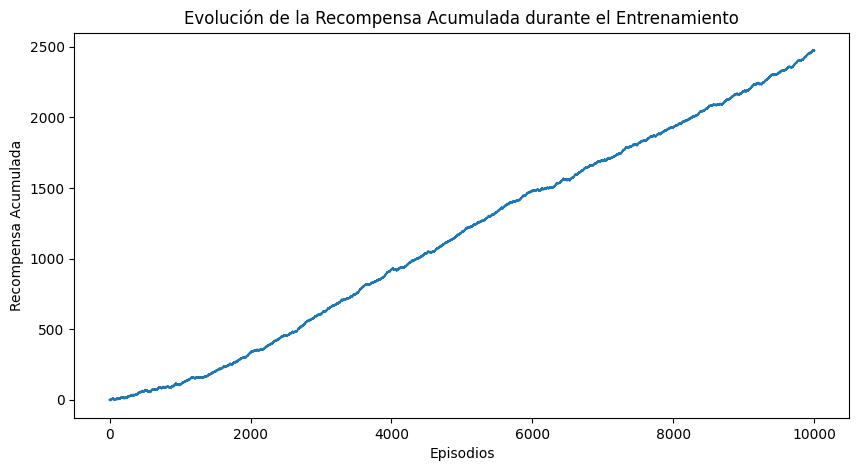

In [7]:
# Graficar las recompensas acumuladas
plt.figure(figsize=(10, 5))
plt.plot(rewards_df['cumulative_reward'])
plt.xlabel('Episodios')
plt.ylabel('Recompensa Acumulada')
plt.title('Evolución de la Recompensa Acumulada durante el Entrenamiento')
plt.show()

In [8]:
import pandas as pd

# Visualizar la tabla de la función de valor
funcion_de_valor = sorted(agent1.value_function.items(), key=lambda kv: kv[1], reverse=True)
tabla = pd.DataFrame({'estado': [x[0] for x in funcion_de_valor], 'valor': [x[1] for x in funcion_de_valor]})

# Mostrar la tabla
tabla

,estado,valor
0,[[ 0. 0. 0. 0. 0. 0. 0.]\n [ 0. 0. 0. ...,1.0
1,[[ 0. 0. 0. 0. 0. 0. 0.]\n [ 0. 0. 0. ...,1.0
2,[[ 0. 0. 0. 0. 0. 0. 0.]\n [ 0. 0. 0. ...,1.0
3,[[ 0. 0. 0. 0. 0. 0. 0.]\n [ 0. 0. 0. ...,1.0
4,[[ 0. 0. 0. 0. 0. 0. 0.]\n [ 0. 0. 0. ...,1.0
...,...,...
136945,[[ 0. 0. 0. 0. 0. 0. 1.]\n [ 0. 0. 0. ...,0.0
136946,[[ 0. 0. 0. 0. 0. 0. 1.]\n [ 0. 0. 0. ...,0.0
136947,[[ 0. 0. 0. 0. 0. 0. 1.]\n [ 0. 0. 0. ...,0.0
136948,[[ 0. 0. 0. 0. 0. 0. 1.]\n [ 0. 0. 0. ...,0.0


In [9]:
import pickle

with open('agente.pickle', 'wb') as handle:
    pickle.dump(agent1.value_function, handle, protocol=pickle.HIGHEST_PROTOCOL)